In [1]:
# Multiple Linear Regression on Toyota Corolla Data
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the dataset
toyota_df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
toyota_df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [4]:
# Quick look at the data
print(toyota_df.head())
print(toyota_df.info())
print(toyota_df.describe())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null  

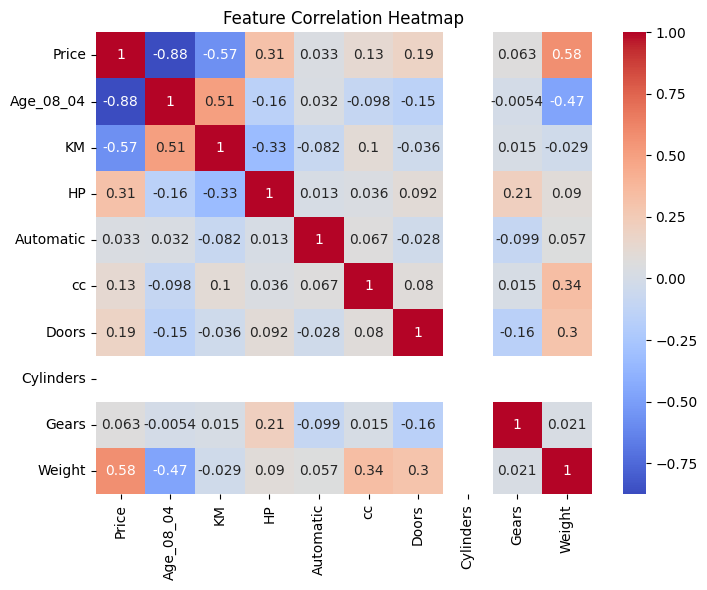

In [5]:
# Exploratory Data Analysis (EDA)
# Visualizing correlation between numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(toyota_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

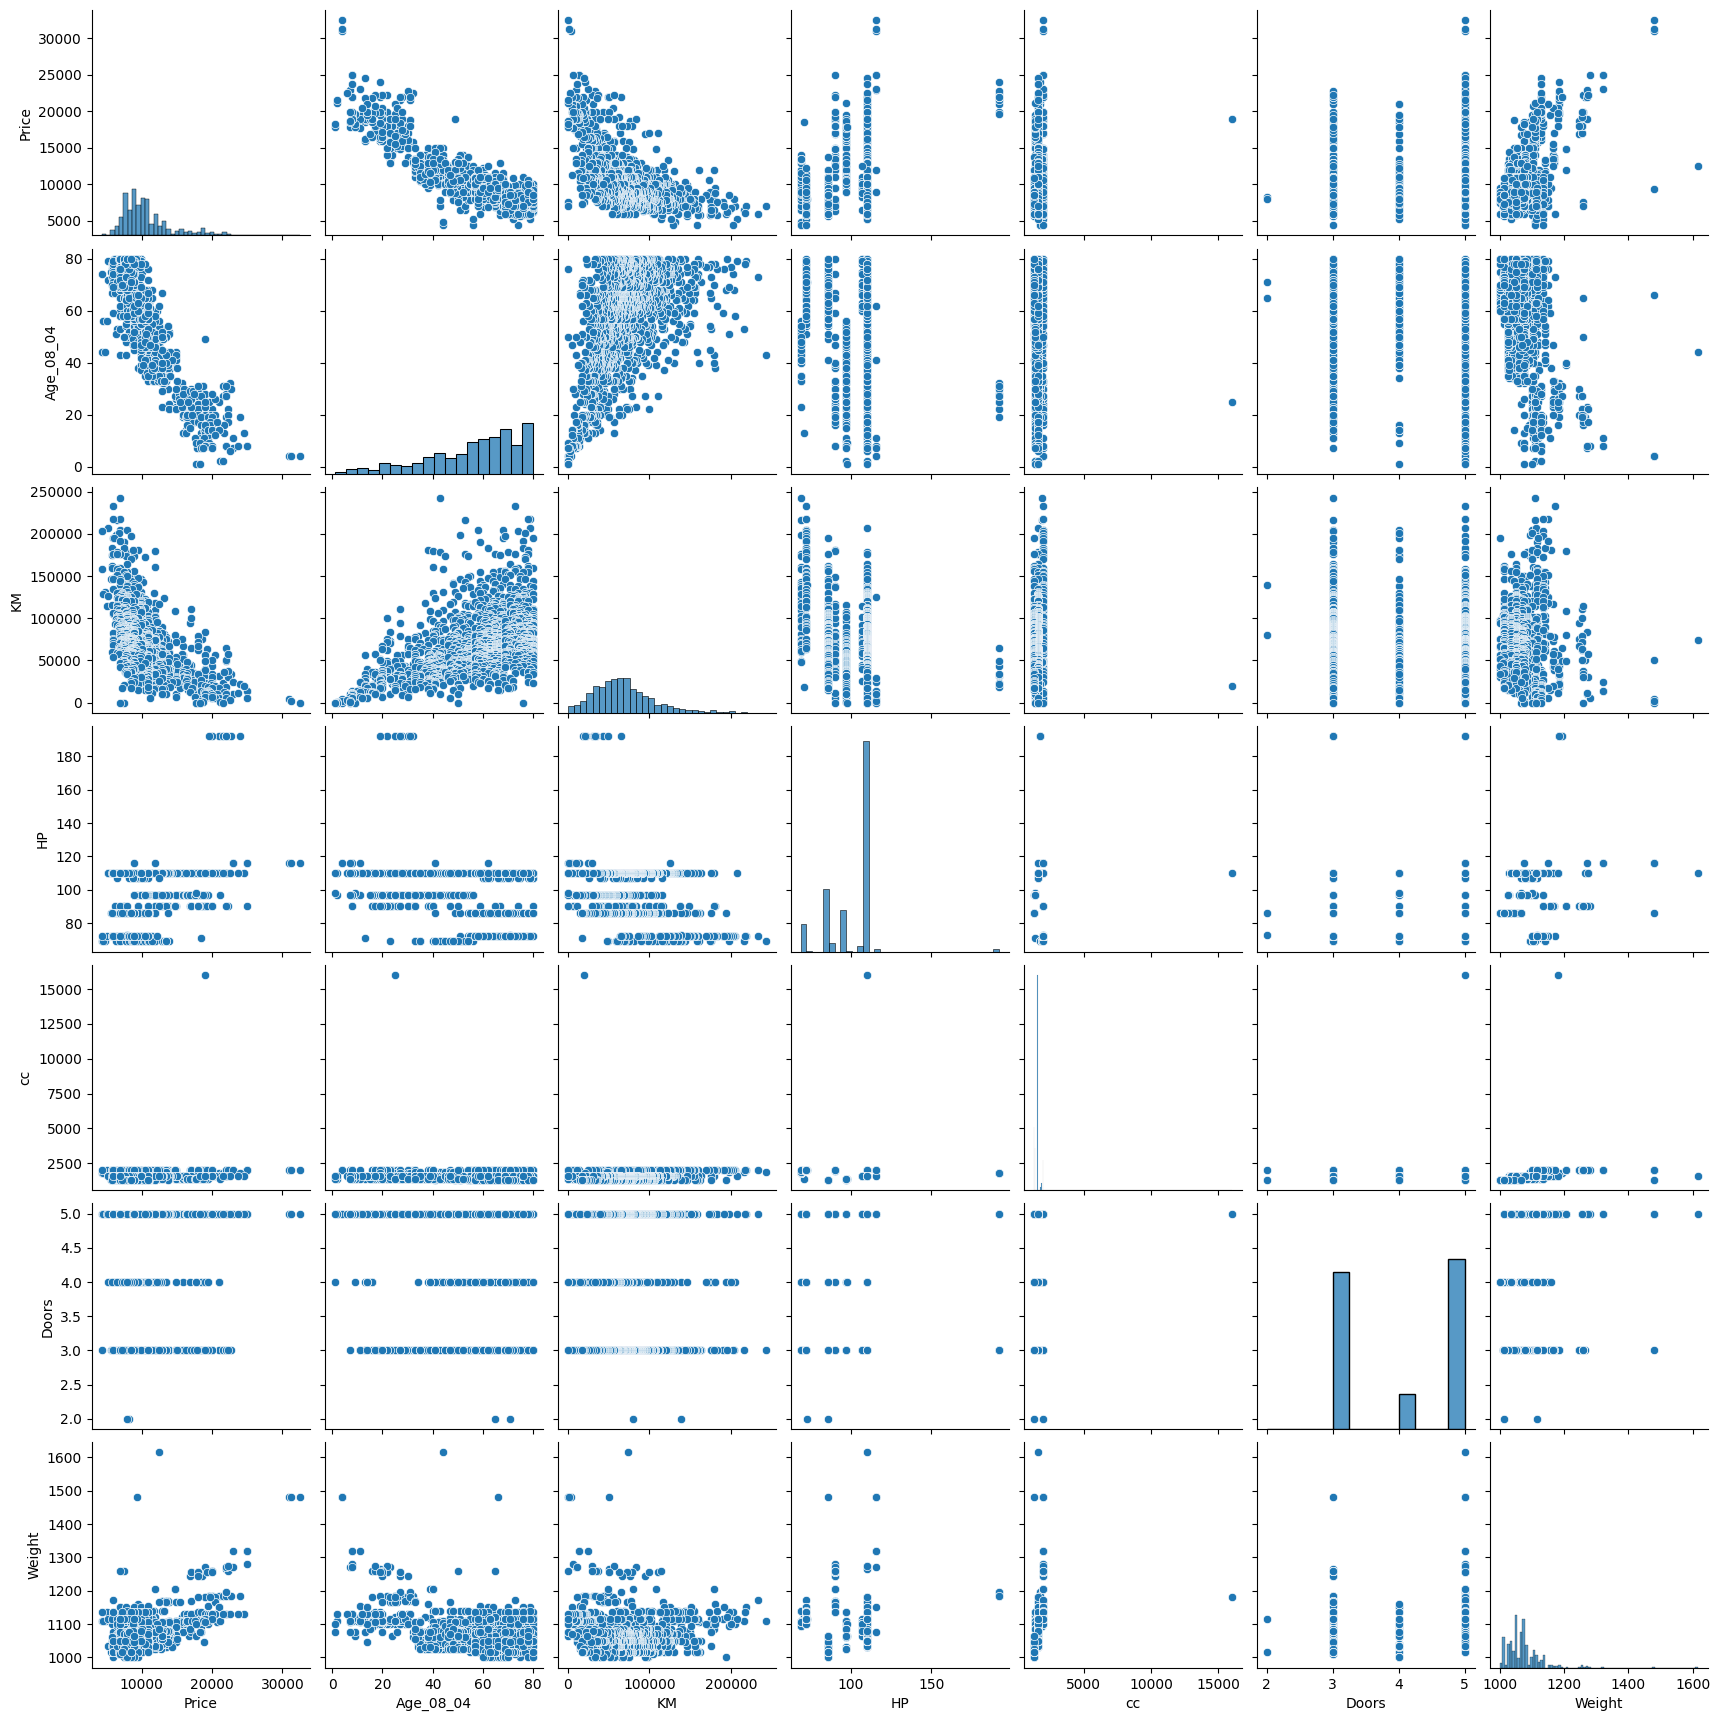

In [6]:
# Pairwise relationship between selected variables
sns.pairplot(toyota_df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']])
plt.show()


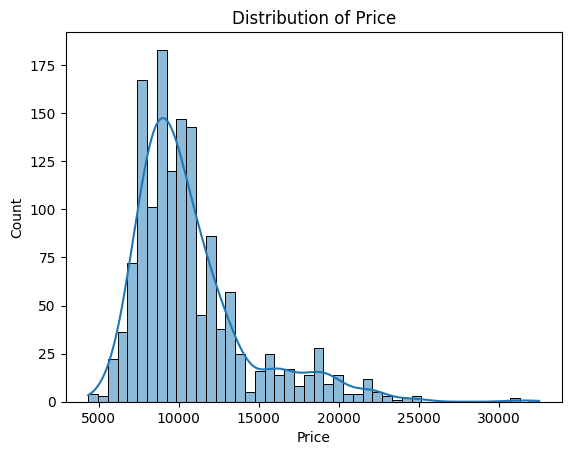

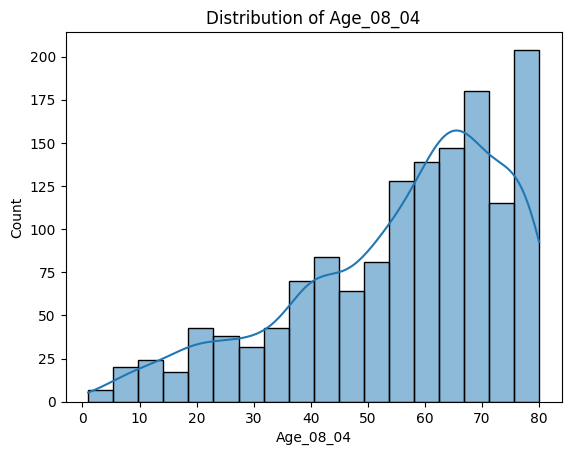

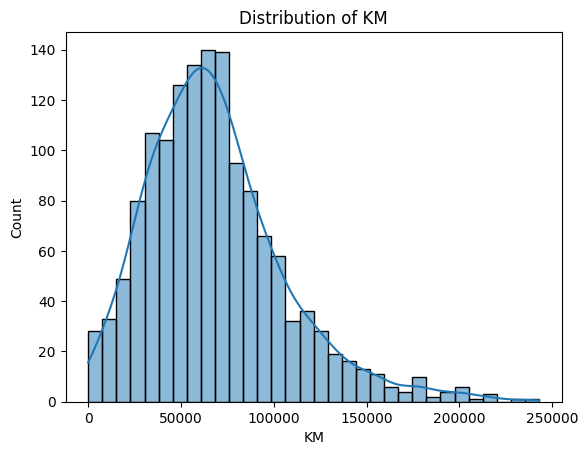

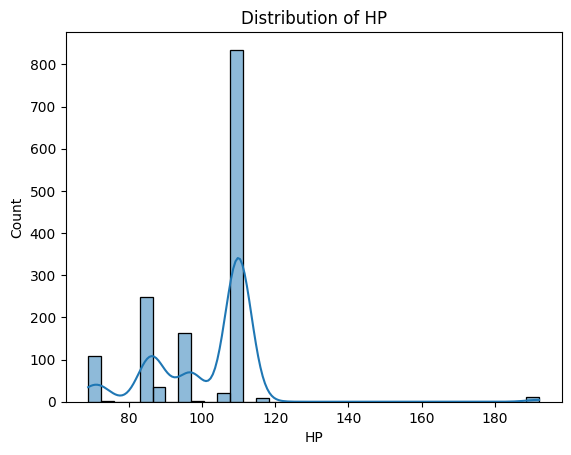

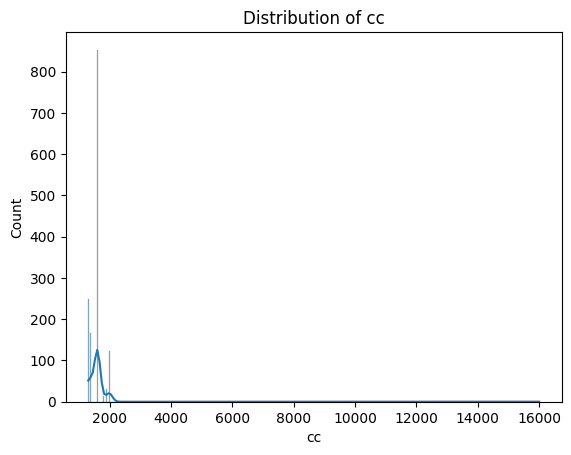

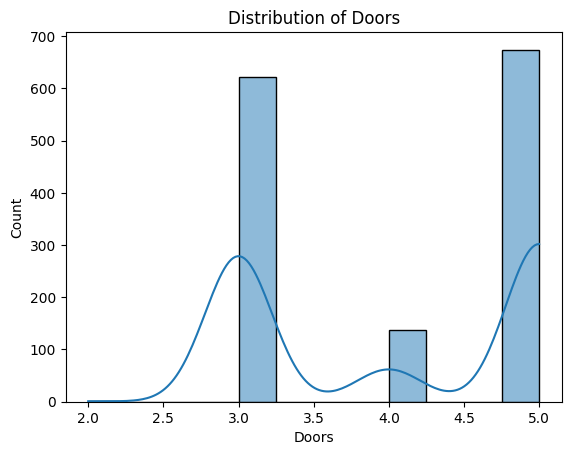

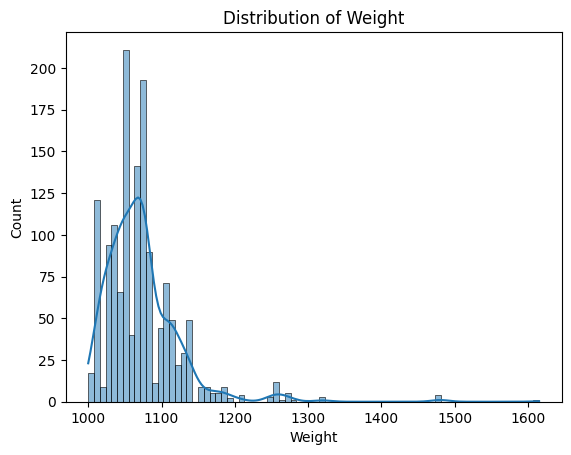

In [7]:
# Checking distribution of numeric attributes
numeric_vars = ['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight']
for feature in numeric_vars:
    plt.figure()
    sns.histplot(toyota_df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()


In [8]:
# Data Preprocessing Phase
# Replacing any missing numeric values with their median
toyota_df.fillna(toyota_df.median(numeric_only=True), inplace=True)

In [9]:
# Separating predictors (X) and target (y)
features = toyota_df[['Age_08_04','KM','Fuel_Type','HP','Automatic','cc','Doors','Cylinders','Gears','Weight']]
target = toyota_df['Price']


In [11]:
# Encoding categorical variable and scaling numerical ones
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
data_pipeline = ColumnTransformer(
    transformers=[
        ('num_features', StandardScaler(), ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight']),
        ('cat_features', OneHotEncoder(drop='first'), ['Fuel_Type'])
    ]
)

In [12]:
# Splitting data into training and testing subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [13]:
# Model 1: Simple Multiple Linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

mlr_pipeline = Pipeline(steps=[
    ('transformer', data_pipeline),
    ('regressor', LinearRegression())
])

mlr_pipeline.fit(X_train, y_train)

predicted_values = mlr_pipeline.predict(X_test)
print("Model 1: Multiple Linear Regression Results")
print("R² Value:", r2_score(y_test, predicted_values))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, predicted_values)))


Model 1: Multiple Linear Regression Results
R² Value: 0.8332952678447362
Root Mean Squared Error: 1491.4107550884653


In [14]:
# Understanding Model Coefficients
regressor_model = mlr_pipeline.named_steps['regressor']
encoded_cols = data_pipeline.named_transformers_['cat_features'].get_feature_names_out(['Fuel_Type'])
all_features = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight'] + list(encoded_cols)
coef_summary = pd.DataFrame({'Feature': all_features, 'Coefficient': regressor_model.coef_})
print("\nFeature Coefficients:\n", coef_summary)



Feature Coefficients:
             Feature  Coefficient
0         Age_08_04 -2267.156303
1                KM  -600.179991
2                HP   234.138332
3         Automatic    21.512689
4                cc   -14.098311
5             Doors   -80.500836
6            Weight  1326.190352
7  Fuel_Type_Diesel     4.202110
8  Fuel_Type_Petrol  1453.694461


In [15]:
# Conceptual Question 1: Normalization vs Standardization
print("Normalization rescales data to a specific range (commonly 0 to 1) — useful when feature units differ.")
print("Standardization centers data around mean 0 with std 1 — helps algorithms assuming Gaussian distribution.")


Normalization rescales data to a specific range (commonly 0 to 1) — useful when feature units differ.
Standardization centers data around mean 0 with std 1 — helps algorithms assuming Gaussian distribution.


In [16]:
# Conceptual Question 2: Handling Multicollinearity
print("Approaches to deal with Multicollinearity:")
print("- Drop or merge highly correlated independent variables.")
print("- Implement dimensionality reduction (e.g., PCA).")
print("- Use regularization models such as Ridge or Lasso.")

Approaches to deal with Multicollinearity:
- Drop or merge highly correlated independent variables.
- Implement dimensionality reduction (e.g., PCA).
- Use regularization models such as Ridge or Lasso.
